#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.simplefilter("ignore")

#Data

(V, Q, Q_r, S_i, dS, TS_i, dTS, N_i, dN, M, DO, i, Sig/TS, Sig, TKN, X, Th, Th_c, Th_n, Th_cn)

In [ ]:
df = pd.read_csv('/content/ASP_Data.csv')
df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Sig,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn
0,0,13619.2,291,27,307,8,56,9,117,28,...,188,12718.44,8.03,7.58,264,299,47,89,1.8950,9.490329
1,1,13337.6,307,22,348,8,57,8,125,29,...,214,13858.02,7.49,7.67,285,340,49,96,1.9175,8.540612
2,2,13440.0,304,24,346,8,62,10,137,32,...,212,15507.90,6.86,7.11,280,338,52,105,1.7775,8.592369


In [ ]:
psi_1 = 0.8
psi_2 = 0.2

#C-BOD Removal Regression 1

*alternate method commented out

In [ ]:
df1 = pd.DataFrame()

df1['y'] = df['M']*df['Sig']/(df['Si']*df['dS']*df['dTS'])
df1['x'] = 2*df['Q']/(df['Si']*df['V'])

# df1['y'] = df['V']*df['Sig']*df['M']/(2*df['Q']*df['dS']*df['dTS'])
# df1['x1'] = df['Si']
# df1['x2'] = df['Th']/2

df1.head(3)

,y,x
0,0.034391,0.006418
1,0.030645,0.006769
2,0.030116,0.007591


In [ ]:
x1 = df1.drop(['y'], axis = 1)
y1 = df1['y']

# x11 = df1['x1']
# x12 = df1['x2']

In [ ]:
df1.corr()

,y,x
y,1.000000,0.374018
x,0.374018,1.000000


In [ ]:
# fig = plt.figure()
# axes = fig.add_subplot(111, projection='3d')
# axes.scatter(df1['x1'], df1['x2'], df1['y'])
# plt.show()

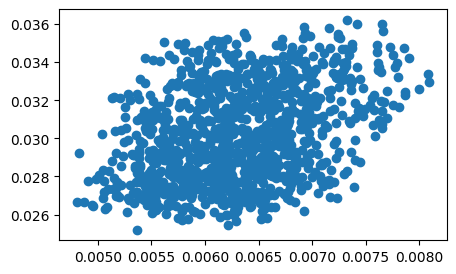

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x1, y1)
plt.show()

In [ ]:
x1 = x1.values.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=2)
x1_poly = poly.fit_transform(x1)

In [ ]:
x1_poly_train, x1_poly_test, y1_train, y1_test = train_test_split(x1_poly, y1, test_size=0.2, random_state=41)

In [ ]:
LR = LinearRegression()
LR.fit(x1_poly_train, y1_train)

LinearRegression()

In [ ]:
# def func1(vars, a, b, c, d):
#   x11, x12 = vars
#   return a/(x11*(1 - np.exp(-b*x12))) + c*x11*(1 - np.exp(-b*x12)) + d

In [ ]:
# ind_vars = np.vstack((x11, x12))

# popt1, pcov1 = curve_fit(func1, ind_vars, y1)

# a = popt1[0]
# b = popt1[1]
# c = popt1[2]
# d = popt1[3]

# print(f'y = a/()')

###Equation

In [ ]:
coeff = LR.coef_
itcept = LR.intercept_

a1 = coeff[2]
b1 = coeff[1]
c1 = itcept

print(f'y = ({a1:.2e}).x^2 + ({b1:.2e}).x + {c1:.2e}')

y = (5.78e+01).x^2 + (8.16e-01).x + 2.28e-02


In [ ]:
y1_pred = LR.predict(x1_poly)
# df1['y_pred'] = func1(ind_vars, a, b, c, d)
r21 = r2_score(y1, y1_pred)
r21

0.14003678638683048

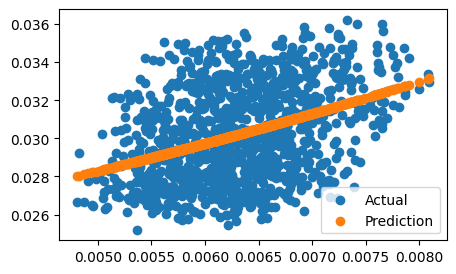

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x1, y1, label="Actual")
plt.scatter(x1, y1_pred, label="Prediction")
plt.legend()
plt.show()

###Constants

In [ ]:
d1 = a1/b1
d2 = b1/c1

In [ ]:
e1 = 2*d1
e2 = 2*d2

#C-BOD Removal Regression 2

*alternate method commented out

In [ ]:
df2 = pd.DataFrame()

df2['y'] = 1/df['Th_c']
df2['x1'] = e1/(df['Si']*df['Th'])
df2['x2'] = df['Si']*df['Th']/e2

df2.head(3)

,y,x1,x2
0,0.124533,0.064266,30.750245
1,0.133511,0.060202,32.826163
2,0.145773,0.065584,30.132112


In [ ]:
x2 = df2.drop(['y'], axis = 1)
y2 = df2['y']

x21 = df2['x1']
x22 = df2['x2']

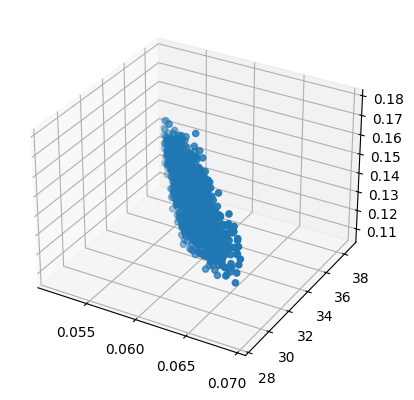

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df2['x1'], df2['x2'], df2['y'])
plt.show()

In [ ]:
# plt.figure(figsize=(5, 3))
# plt.scatter(x2, y2)
# plt.show()

In [ ]:
# x2 = x2.values.reshape(-1, 1)

In [ ]:
# poly2 = PolynomialFeatures(degree=2, include_bias = False)
# x2_poly = poly2.fit_transform(x2)

In [ ]:
# x2_poly_train, x2_poly_test, y2_train, y2_test = train_test_split(x2_poly, y2, test_size=0.2, random_state=41)

In [ ]:
# LR2 = LinearRegression()
# LR2.fit(x2_poly_train, y2_train)

In [ ]:
def func2(vars, a, e3):
  x21, x22 = vars
  return a/(x21 + x22 + 1) + e3

In [ ]:
ind_vars = np.vstack((x21, x22))

popt2, pcov2 = curve_fit(func2, ind_vars, y2)

a = popt2[0]
e3 = popt2[1]

###Equation

In [ ]:
print(f'y = ({a:.4f})/(x1 + 1 + x2) + ({e3:.4f})')

y = (1.2906)/(x1 + 1 + x2) + (0.1019)


In [ ]:
# y2_pred = LR2.predict(x2_poly)
y2_pred = func2(ind_vars, a, e3)
r22 = r2_score(y2, y2_pred)
r22

0.040680634166728735

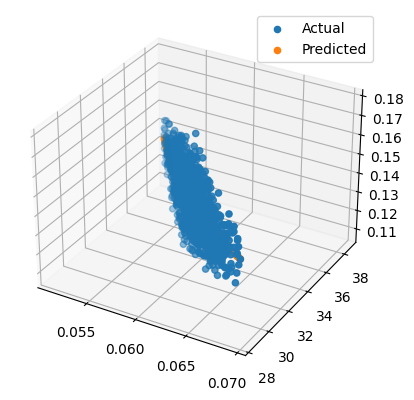

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df2['x1'], df2['x2'], df2['y'], label = "Actual")
axes.scatter(df2['x1'], df2['x2'], func2(ind_vars, a, e3), label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
# Kd = -alpha/beta
Kd = -e3
print(f'Kd = {Kd:.3f}')

Kd = -0.102


In [ ]:
Ks = psi_1*d1*Kd
print(f'Ks = {Ks:.3f}')

Ks = -5.776


In [ ]:
Ki = psi_1*d2*Kd
print(f'Ki = {Ki:.3f}')

Ki = -2.923


In [ ]:
# Mu_max = -beta
Mu_max = a
print(f'Mu_max = {Mu_max:.4f}')

Mu_max = 1.2906


In [ ]:
k = Kd/(c1*Ki)
print(f'k = {k:.4f}')

k = 1.5315


In [ ]:
Y = Mu_max/k
print(f'Y = {Y:.2e}')

Y = 8.43e-01


###Psi_1 Calc

In [ ]:
df['psi_1'] = np.sqrt(np.abs(df['Q']*(-Ki*(1 + Mu_max*df['Th_c']*(1 + Kd*df['Th_c'])) + np.sqrt((Ki*(1 + Mu_max*df['Th_c']*(1 + Kd*df['Th_c'])))**2 - (4*Ks*Ki)))/(df['V']*Kd*df['Si'])))

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1
0,0,13619.2,291,27,307,8,56,9,117,28,...,12718.44,8.03,7.58,264,299,47,89,1.8950,9.490329,0.570971
1,1,13337.6,307,22,348,8,57,8,125,29,...,13858.02,7.49,7.67,285,340,49,96,1.9175,8.540612,0.697008
2,2,13440.0,304,24,346,8,62,10,137,32,...,15507.90,6.86,7.11,280,338,52,105,1.7775,8.592369,0.809761


#NH4-N Removal Regression 1

In [ ]:
df3 = pd.DataFrame()

df3['y'] = df['V']*df['Sig']*df['M']/(2*df['Q']*df['dN']*df['dTS'])
df3['x1'] = df['Ni']*df['Th']/2
df3['x2'] = 1/df['DO']

df3.head(3)

,y,x1,x2
0,30.097651,212.240,0.327869
1,26.332669,218.595,0.284900
2,21.361745,220.410,0.287356


In [ ]:
y3 = df3['y']
x3 = df3.drop(['y'], axis = 1)

x31 = df3['x1']
x32 = df3['x2']

In [ ]:
df3.corr()

,y,x1,x2
y,1.00000,-0.433040,0.104540
x1,-0.43304,1.000000,-0.142971
x2,0.10454,-0.142971,1.000000


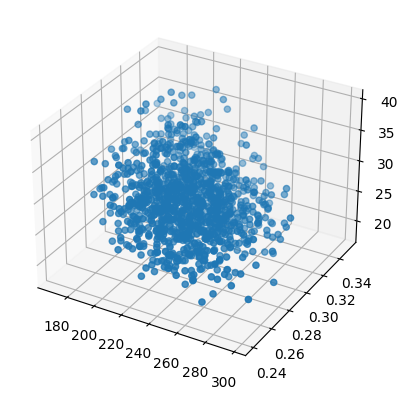

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df3['x1'], df3['x2'], df3['y'])
plt.show()

In [ ]:
def func3(vars, a, b, c, d):
  x31, x32 = vars
  return (a/x31 + c + b*x31)*(d*x32 - 1)

In [ ]:
ind_vars = np.vstack((x31, x32))

popt3, pcov3 = curve_fit(func3, ind_vars, y3)

a3 = popt3[0]
b3 = popt3[1]
c3 = popt3[2]
d3 = popt3[3]

###Equation

In [ ]:
print(f'y = [({a3:.2e})/x1 + ({b3:.2e}).x1 + ({c3:.2e})].[({d3:.2e}).x3 - 1]')

y = [(-2.43e+03)/x1 + (1.63e-02).x1 + (-1.82e+01)].[(-2.73e-01).x3 - 1]


In [ ]:
r23 = r2_score(y3, func3(ind_vars, a3, b3, c3, d3))
r23

0.19147008816529598

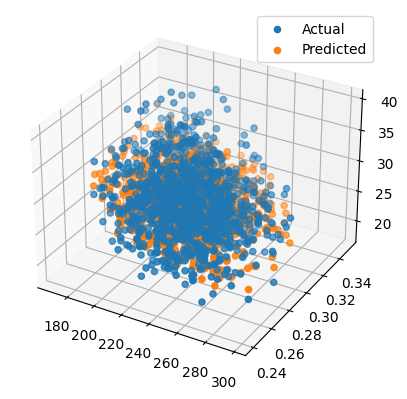

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df3['x1'], df3['x2'], df3['y'], label = "Actual")
axes.scatter(df3['x1'], df3['x2'], func3(ind_vars, a3, b3, c3, d3), label = "Predicted")
axes.legend()
plt.show()

###Constants

In [ ]:
kn = 1/(psi_2*c3)
print(f'kn = {kn:.3f}')

kn = -0.274


In [ ]:
Ko = d3
print(f'Ko = {Ko:.2e}')

Ko = -2.73e-01


#NH4-N Removal Regression 2

In [ ]:
df4 = pd.DataFrame()

b41 = a3/(psi_2*c3)
b42 = psi_2*b3/c3
# b43 = Ko

df4['y'] = 2*b41/(df['Th']*df['Ni']) + b42*df['Th']*df['Ni']/2 + 1
df4['x1'] = (df['Th_cn']**2)*(1 + Ko/df['DO'])
df4['x2'] = df['Th_cn']*(1 + Ko/df['DO'])

df4.head(3)

,y,x1,x2
0,4.100584,82.009533,8.641380
1,4.008209,67.272203,7.876743
2,3.982793,68.040553,7.918719


In [ ]:
y4 = df4['y']
x4 = df4.drop(['y'], axis = 1)

x41 = df4['x1']
x42 = df4['x2']

In [ ]:
df4.corr()

,y,x1,x2
y,1.000000,-0.637518,-0.655745
x1,-0.637518,1.000000,0.996479
x2,-0.655745,0.996479,1.000000


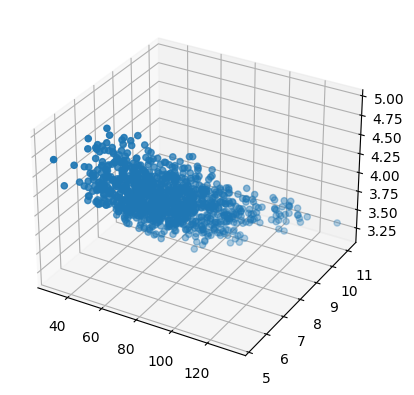

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df4['x1'], df4['x2'], df4['y'])
plt.show()

In [ ]:
def func4(vars, alpha, beta):
  x41, x42 = vars
  return alpha*x41 + beta*x42

In [ ]:
ind_vars = np.vstack((x41, x42))

popt4, pcov4 = curve_fit(func4, ind_vars, y4)

alpha4 = popt4[0]
beta4 = popt4[1]

###Equation

In [ ]:
print(f'y = ({alpha4:.4f}).x1 + ({beta4:.3f}).x2')

y = (-0.0787).x1 + (1.178).x2


In [ ]:
r24 = r2_score(y4, func4(ind_vars, alpha4, beta4))
r24

0.17969321873402622

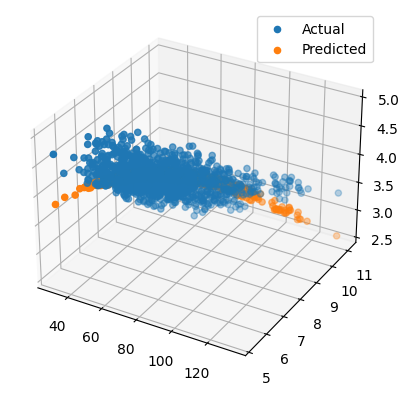

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df4['x1'], df4['x2'], df4['y'], label = "Actual")
axes.scatter(df4['x1'], df4['x2'], func4(ind_vars, alpha4, beta4), label = "Predicted")
axes.legend()
plt.show()

###Constants

In [ ]:
Kdn = alpha4/beta4
print(f'Kdn = {Kdn:.2e}')

Kdn = -6.69e-02


In [ ]:
Mu_nm = -beta4
print(f'Mu_nm = {Mu_nm:.3f}')

Mu_nm = -1.178


In [ ]:
Yn = Mu_nm/kn
print(f'Yn = {Yn:.3f}')

Yn = 4.292


In [ ]:
Kn = a3*Kdn/c3
print(f'Kn = {Kn:.3f}')

Kn = -8.907


In [ ]:
Ki = Kdn*c3/b3
print(f'Ki = {Ki:.3f}')

Ki = 74.965


###Psi_2 Calc

In [ ]:
df3['e'] = df3['y']/(d3*df3['x2'] - 1)
df3.head(1)

,y,x1,x2,e
0,30.097651,212.24,0.327869,-27.626359


In [ ]:
# df['psi_2'] = np.sqrt(np.abs(Ki*df['Q']/(Kdn*df['Ni']*df['V'])))*np.sqrt(np.abs((1 - Mu_nm*(1 + Ko/df['DO'])*df['Th_cn']*(Kdn*df['Th_cn'] - 1)) - np.sqrt((1 - Mu_nm*(1 + Ko/df['DO'])*df['Th_cn']*(Kdn*df['Th_cn'] - 1)) - (4*Kn/Ki))))

df['psi_2'] = (2*df['Q']/(df['Ni']*df['V']))*((df3['e'] - c3)/(2*b3) + np.sqrt(((df3['e'] - c3)**2) - 4*a3*b3)/(2*b3))/10

df.head(3)

,Unnamed: 0,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,...,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1,psi_2
0,0,13619.2,291,27,307,8,56,9,117,28,...,8.03,7.58,264,299,47,89,1.8950,9.490329,0.570971,0.645277
1,1,13337.6,307,22,348,8,57,8,125,29,...,7.49,7.67,285,340,49,96,1.9175,8.540612,0.697008,0.875228
2,2,13440.0,304,24,346,8,62,10,137,32,...,6.86,7.11,280,338,52,105,1.7775,8.592369,0.809761,1.268390


#Results

####Psi_1

In [ ]:
psi_1 = df['psi_1'].mean()
psi_1_min = df['psi_1'].min()
psi_1_max = df['psi_1'].max()

print(f'psi_1 :\n Range       : ({psi_1_min:.3f}, {psi_1_max:.3f})')
print(f' Mean Value  : {psi_1:.4f}')

psi_1 :
 Range       : (0.461, 0.868)
 Mean Value  : 0.7051


####Psi_2

In [ ]:
psi_2 = df['psi_2'].mean()
psi_2_min = df['psi_2'].min()
psi_2_max = df['psi_2'].max()

print(f'psi_2 :\n Range       : ({psi_2_min:.3f}, {psi_2_max:.3f})')
print(f' Mean Value  : {psi_2:.4f}')

psi_2 :
 Range       : (0.358, 1.443)
 Mean Value  : 0.7770


####Constants

In [ ]:
print(f'Mu_max = {Mu_max:.1f}')
print(f'Mu_nm = {Mu_nm:.2f}\n')
print(f'Kd = {Kd:.3f}')
print(f'Kdn = {Kdn:.3f}\n')
print(f'Ks = {Ks:.3f}')
print(f'Kn = {Kn:.4f}')

Mu_max = 1.3
Mu_nm = -1.18

Kd = -0.102
Kdn = -0.067

Ks = -5.776
Kn = -8.9069
